In [100]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Stock Data Analysis

In [101]:
stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'ICICIBANK.NS']

# Fetching data for the last 6 months
data = yf.download(stocks, period='6mo', auto_adjust=True)


[*********************100%%**********************]  4 of 4 completed


## Calculate the daily percentage change for each stock

### Daily percentage change

In [102]:

daily_pct_change = data['Close'].pct_change() * 100
print(daily_pct_change)


Ticker      ICICIBANK.NS   INFY.NS  RELIANCE.NS    TCS.NS
Date                                                     
2024-03-20           NaN       NaN          NaN       NaN
2024-03-21     -0.248956 -0.016075     0.500433  0.051632
2024-03-22      0.785731 -2.949117     0.279128 -1.561811
2024-03-26     -0.605352 -1.073665    -0.924385 -0.854026
2024-03-27      0.004624 -0.589559     3.556874 -0.943907
...                  ...       ...          ...       ...
2024-09-16      0.999720  0.316343    -0.086582 -0.206742
2024-09-17      0.415726  0.117936     0.064572 -0.168395
2024-09-18      1.596877 -3.093392    -0.601107 -3.540000
2024-09-19      0.283310  0.108338     0.425371 -1.150444
2024-09-20      3.595197  0.609759     1.105687 -0.261862

[124 rows x 4 columns]


## Plot the closing prices and daily percentage changes

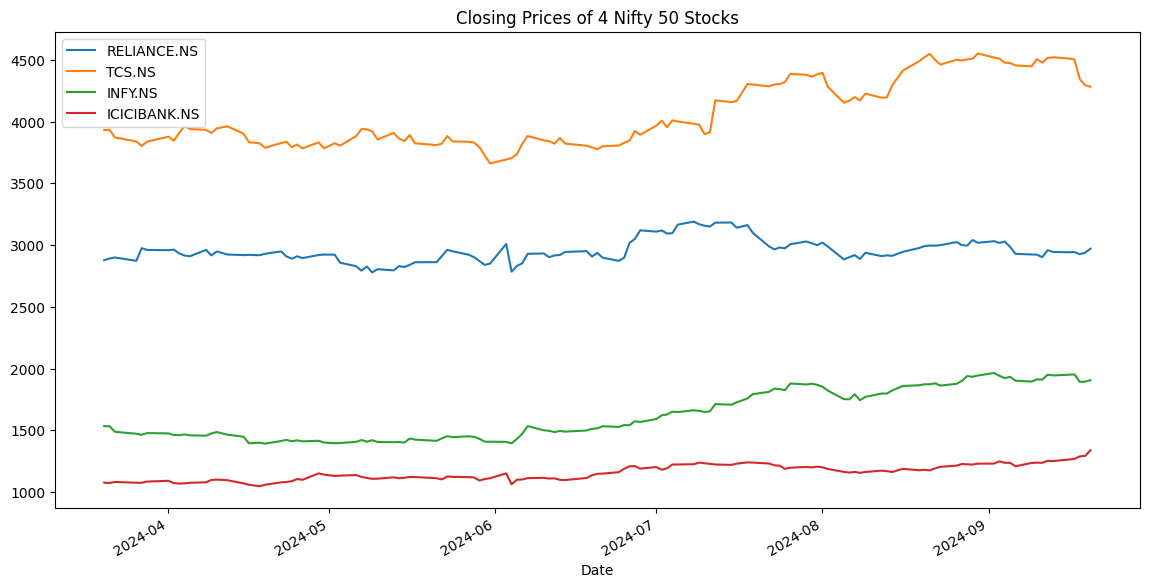

In [103]:
plt.figure(figsize=(14, 7))
for stock in stocks:
    data['Close'][stock].plot(label=stock)
plt.title('Closing Prices of 4 Nifty 50 Stocks')
plt.legend()
plt.show()

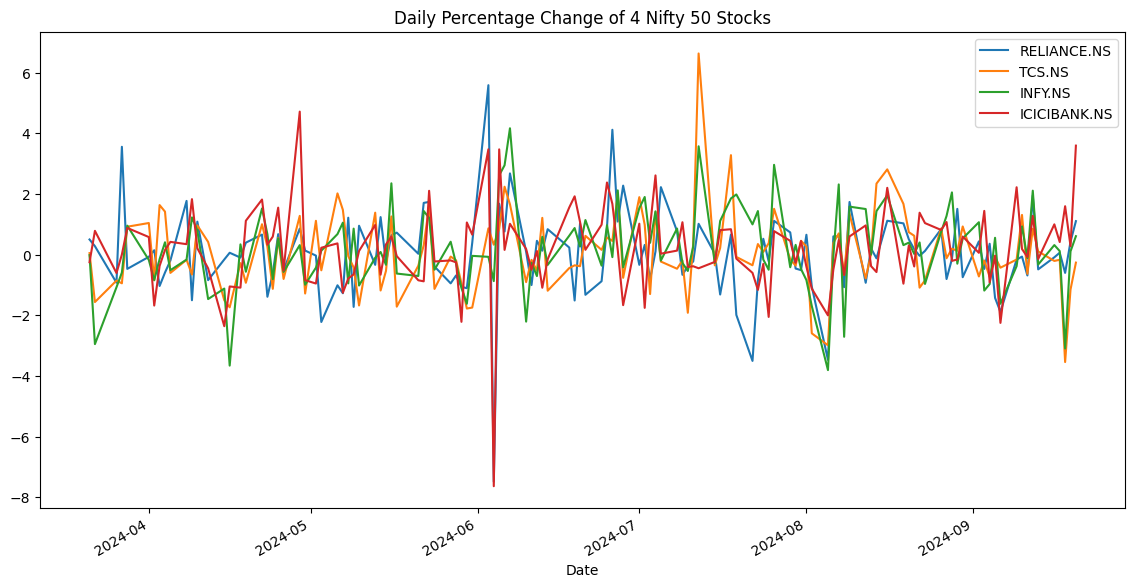

In [104]:
# Plot daily percentage change
plt.figure(figsize=(14, 7))
for stock in stocks:
    daily_pct_change[stock].plot(label=stock)
plt.title('Daily Percentage Change of 4 Nifty 50 Stocks')
plt.legend()
plt.show()

## Calculating the moving average (20 days) and plotting it

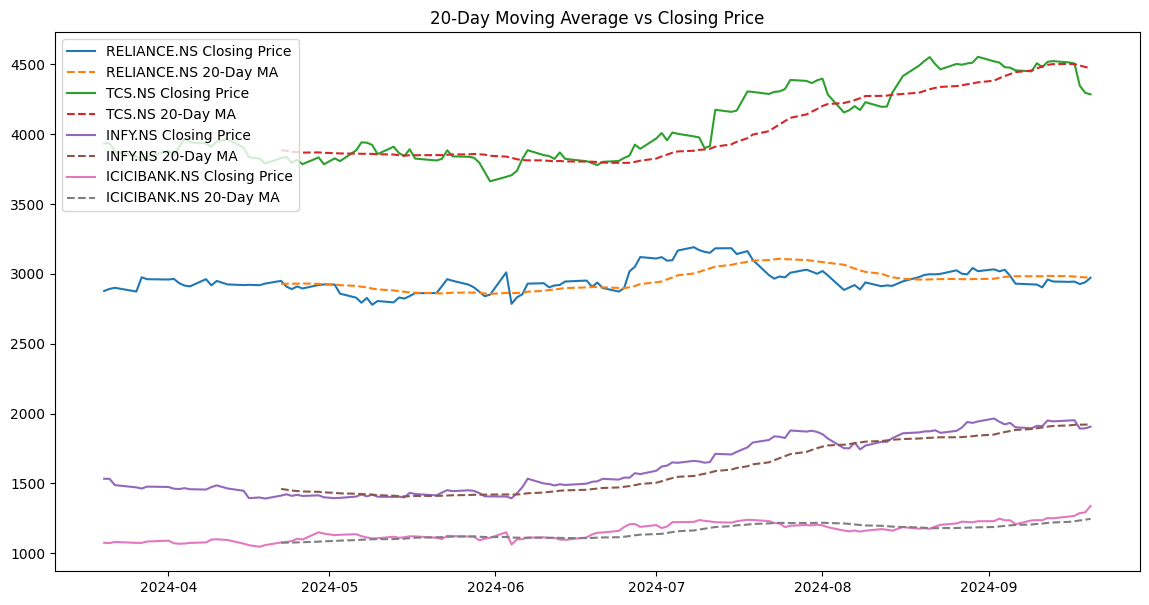

In [105]:
# Moving Average (20 days)
moving_avg_20 = data['Close'].rolling(window=20).mean()

# Plot moving averages against closing prices
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(data['Close'][stock], label=f'{stock} Closing Price')
    plt.plot(moving_avg_20[stock], label=f'{stock} 20-Day MA', linestyle='--')
plt.title('20-Day Moving Average vs Closing Price')
plt.legend()
plt.show()

#  Strategy Development

##  Develop a simple moving average crossover strategy

In [106]:
data = yf.download('RELIANCE.NS', period='2y', auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


## Developing simple moving average crossover strategy

In [107]:
# Calculate the 20-day and 50-day simple moving averages (SMA)
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

In [118]:
data.dropna(subset=['SMA20', 'SMA50'], inplace=True)

# buy/sell signals
data['Signal'] = 0
data['Signal'] = np.where(data['SMA20'] > data['SMA50'], 1, 0)  # Buy when SMA20 crosses above SMA50
data['Position'] = data['Signal'].diff()

## Backtest the Strategy and Identify Buy and Sell Signals

In [109]:

print(data[['SMA20', 'SMA50', 'Position']].tail(20)) 

                  SMA20        SMA50  Position
Date                                          
2024-08-26  2963.290088  3014.713115       0.0
2024-08-27  2961.839258  3016.319360       0.0
2024-08-28  2960.866089  3017.349272       0.0
2024-08-29  2962.925305  3019.145654       0.0
2024-08-30  2962.870349  3021.382007       0.0
2024-09-02  2965.070007  3023.283398       0.0
2024-09-03  2971.739575  3025.677153       0.0
2024-09-04  2978.082080  3028.795190       0.0
2024-09-05  2981.392566  3030.544937       0.0
2024-09-06  2983.452722  3028.781782       0.0
2024-09-09  2982.766394  3026.264863       0.0
2024-09-10  2983.350452  3022.321660       0.0
2024-09-11  2982.633020  3018.186748       0.0
2024-09-12  2984.922498  3014.983516       0.0
2024-09-13  2984.865002  3012.001558       0.0
2024-09-16  2983.159998  3008.904814       0.0
2024-09-17  2980.795007  3004.466758       0.0
2024-09-18  2977.272498  2999.185356       0.0
2024-09-19  2974.427502  2994.576523       0.0
2024-09-20  2

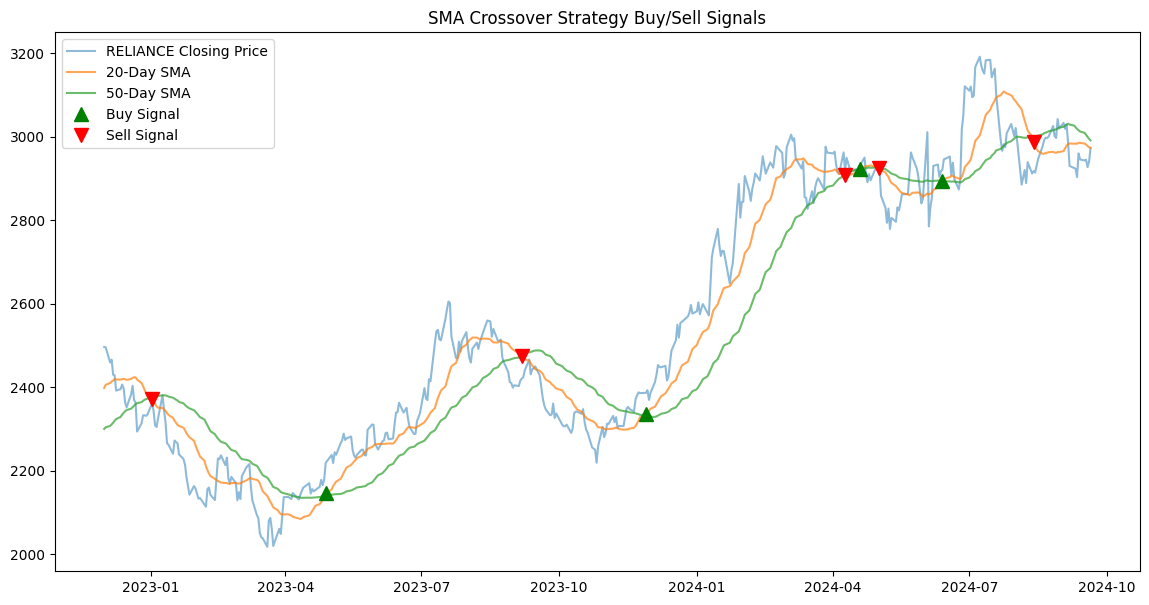

In [110]:
plt.figure(figsize=(14, 7))

# Closing price
plt.plot(data['Close'], label='RELIANCE Closing Price', alpha=0.5)

# 20-day and 50-day SMAs
plt.plot(data['SMA20'], label='20-Day SMA', alpha=0.7)
plt.plot(data['SMA50'], label='50-Day SMA', alpha=0.7)

# Marking buy signals (Position == 1)
plt.plot(data[data['Position'] == 1].index, 
         data['SMA20'][data['Position'] == 1], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Marking sell signals (Position == -1)
plt.plot(data[data['Position'] == -1].index, 
         data['SMA20'][data['Position'] == -1], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

# Add title and legend
plt.title('SMA Crossover Strategy Buy/Sell Signals')
plt.legend()
plt.show()

##  Calculating the Returns Generated by the Strategy Compared to Buy-and-Hold

In [111]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Strategy returns based on position
data['Strategy Return'] = data['Daily Return'] * data['Position'].shift(1)

In [112]:
# Cumulative returns for strategy and buy-and-hold
cumulative_return_strategy = (1 + data['Strategy Return'].fillna(0)).cumprod() - 1
cumulative_return_buy_hold = (1 + data['Daily Return'].fillna(0)).cumprod() - 1

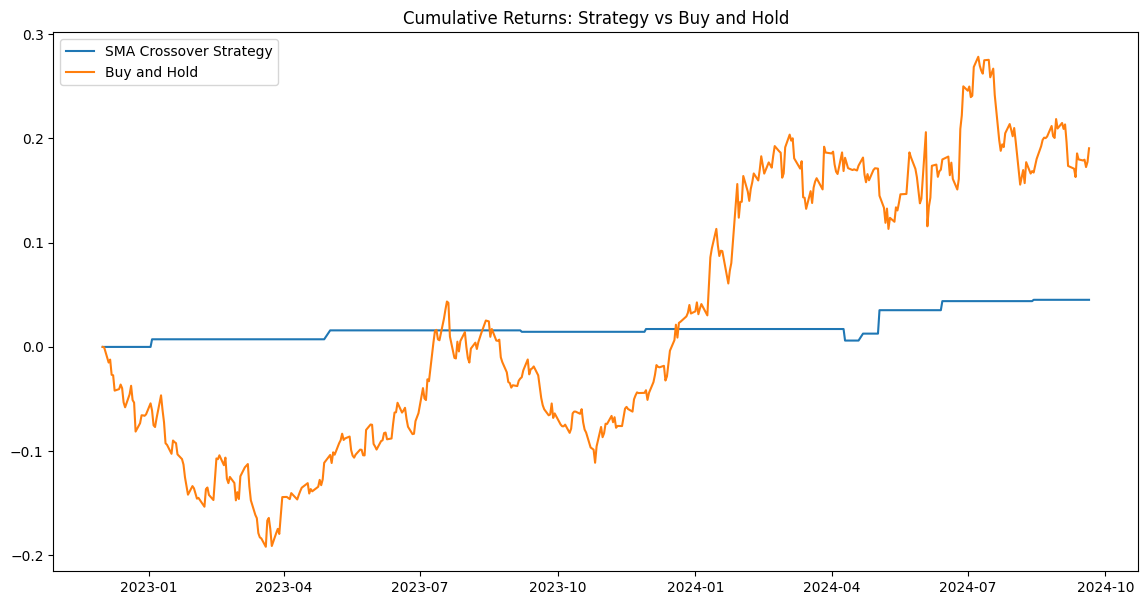

In [113]:
# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_return_strategy, label='SMA Crossover Strategy')
plt.plot(cumulative_return_buy_hold, label='Buy and Hold')
plt.title('Cumulative Returns: Strategy vs Buy and Hold')
plt.legend()
plt.show()

# Risk Management

In [114]:
data = yf.download('RELIANCE.NS', period='6mo', auto_adjust=True)

# Calculating the 20-day and 50-day simple moving averages (SMA)
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

data.dropna(subset=['SMA20', 'SMA50'], inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [119]:
# Define buy/sell signals using the 20-day and 50-day SMAs
data['Signal'] = 0
data['Signal'] = np.where(data['SMA20'] > data['SMA50'], 1, 0) 


In [120]:
# Calculate position: a change from 0 to 1 (buy) or from 1 to 0 (sell)
data['Position'] = data['Signal'].diff()


In [121]:
# Stop-loss percentage
stop_loss_pct = 0.05

# Implement stop-loss mechanism
data['In Position'] = 0
in_position = 0
entry_price = 0

In [116]:
# Implement stop-loss mechanism with iloc for positional indexing
for i in range(1, len(data)):
    if data['Position'].iloc[i] == 1:  # Buy Signal (SMA20 > SMA50)
        if in_position == 0:  # Only buy if not already in position
            entry_price = data['Close'].iloc[i]
            in_position = 1
        data.at[data.index[i], 'In Position'] = 1
    elif in_position == 1 and data['Close'].iloc[i] < entry_price * (1 - stop_loss_pct):  # Stop-loss triggered
        in_position = 0
        data.at[data.index[i], 'In Position'] = 0
    elif in_position == 1:  # Maintain position if no stop-loss is triggered
        data.at[data.index[i], 'In Position'] = 1


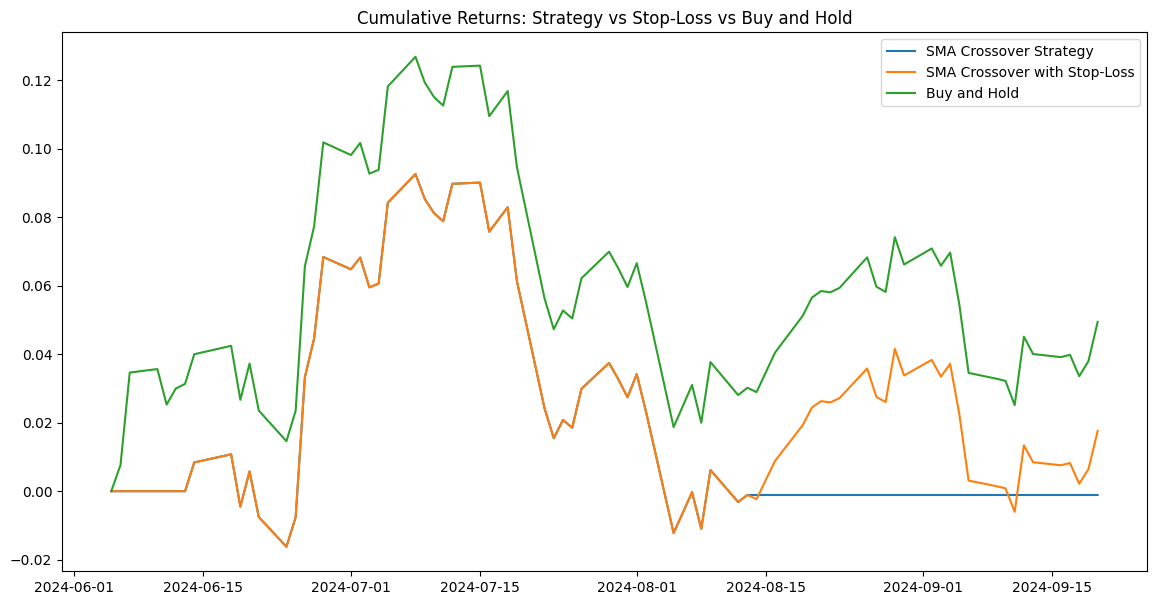

In [117]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate strategy returns with stop-loss
data['Strategy Return with Stop Loss'] = data['Daily Return'] * data['In Position'].shift(1)

# Cumulative returns for the stop-loss strategy
cumulative_return_stop_loss = (1 + data['Strategy Return with Stop Loss'].fillna(0)).cumprod() - 1

# Cumulative returns for the original SMA crossover strategy (without stop-loss)
data['Strategy Return'] = data['Daily Return'] * data['Signal'].shift(1)
cumulative_return_strategy = (1 + data['Strategy Return'].fillna(0)).cumprod() - 1

# Cumulative returns for buy-and-hold strategy
cumulative_return_buy_hold = (1 + data['Daily Return'].fillna(0)).cumprod() - 1

# Plot cumulative returns for comparison
plt.figure(figsize=(14, 7))
plt.plot(cumulative_return_strategy, label='SMA Crossover Strategy')
plt.plot(cumulative_return_stop_loss, label='SMA Crossover with Stop-Loss')
plt.plot(cumulative_return_buy_hold, label='Buy and Hold')
plt.title('Cumulative Returns: Strategy vs Stop-Loss vs Buy and Hold')
plt.legend()
plt.show()
